<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-Syntax" data-toc-modified-id="Basic-Syntax-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic Syntax</a></span><ul class="toc-item"><li><span><a href="#The-plot-function" data-toc-modified-id="The-plot-function-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The plot function</a></span></li><li><span><a href="#Current-Figure-and-Axes-Concepts" data-toc-modified-id="Current-Figure-and-Axes-Concepts-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Current Figure and Axes Concepts</a></span></li><li><span><a href="#Basic-Plot-Types" data-toc-modified-id="Basic-Plot-Types-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Basic Plot Types</a></span></li><li><span><a href="#Plotting-Categorical-Data" data-toc-modified-id="Plotting-Categorical-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plotting Categorical Data</a></span></li><li><span><a href="#Formatting-Plots" data-toc-modified-id="Formatting-Plots-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Formatting Plots</a></span><ul class="toc-item"><li><span><a href="#Labels" data-toc-modified-id="Labels-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Labels</a></span></li><li><span><a href="#Resizing" data-toc-modified-id="Resizing-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Resizing</a></span></li><li><span><a href="#Colors" data-toc-modified-id="Colors-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Colors</a></span></li><li><span><a href="#Axis-Scaling" data-toc-modified-id="Axis-Scaling-1.5.4"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>Axis Scaling</a></span></li></ul></li></ul></li><li><span><a href="#Connecting-with-Numpy" data-toc-modified-id="Connecting-with-Numpy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Connecting with Numpy</a></span><ul class="toc-item"><li><span><a href="#Reading-in-Data" data-toc-modified-id="Reading-in-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reading in Data</a></span></li><li><span><a href="#Linear-Regression---Theory" data-toc-modified-id="Linear-Regression---Theory-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear Regression - Theory</a></span></li><li><span><a href="#Linear-Regression---Application" data-toc-modified-id="Linear-Regression---Application-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Linear Regression - Application</a></span></li></ul></li></ul></div>

<b>If you are using google colab you should save this notebook and any associated textfiles to their own folder on your google drive. Then you will need to adapt the following commands so that the notebook runs from the location of that folder. This is only necessary for the brief section on reading text files into Python.</b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Colab command to navigate to the folder holding the homework,
# CHANGE FOR YOUR SPECIFIC FOLDER LOCATION IN GOOGLE DRIVE
# Note: if there are spaces in the path, you need to preceed them with a backslash '\'
%cd /content/drive/My\ Drive/CHE597/Lectures/4-Visualization



# Introduction to Matplotlib
<b>Matplotlib</b> is probably the most established plotting library in python. There are several other newcomers that are ascendant (some even built on top of matplotlib), but matplotlib is likely here to stay and is capable of doing everything you will need for this course.  

We will primarily utilize the matplotlib sub-module called `pyplot`. This is an interface to MATLAB style plotting functions that will familiar to many of the students in this course. Thus in all of the following examples we will assume the following import call has been performed

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In the following sections keywords you should know and in-text code will be presented as <b>keywords</b> and `code`, respectively. 

## Basic Syntax

### The plot function
Making your first plot in matplotlib can be accomplished with just two function calls:

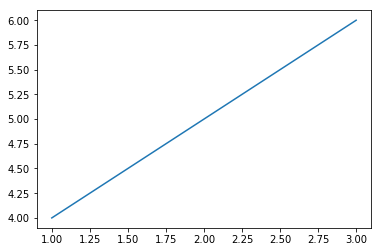

In [2]:
plt.plot([1,2,3],[4,5,6])
plt.show()

Here we have passed the `.plot()` function data for x (first) and data for y (second) and used the `.show()` function to display the result. 

A couple important things are illustrated by this example. First, every change to the plot (including displaying or saving it) is done through a pyplot function. Second, matplotlib tries to keep things simple and so it automatically guessed sensible x and y ranges for the plot and default colors. Every component of the plot can be modified and many through the `.plot()` arguments: 

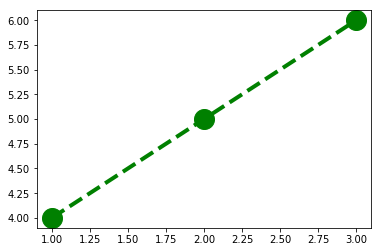

In [3]:
plt.plot([1,2,3],[4,5,6],color='green', marker='o', linestyle='dashed',linewidth=4.0,markersize=20)
plt.show()

### Current Figure and Axes Concepts
Matplotlib keeps track of the <b>current figure</b> and <b>current axes</b>. By default these are set to the last of each that were created. This is how matplotlib functions like `plot()` know where to put things. For example:

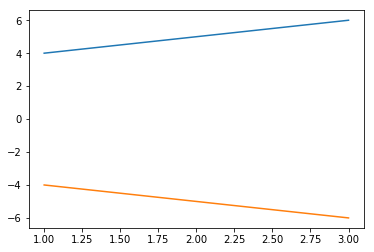

In [4]:
plt.plot([1,2,3],[4,5,6])
plt.plot([1,2,3],[-4,-5,-6])
plt.show()

This example results in two lines in the same figure/set of axes. This is because unless we create a new figure, the `matplotlib.pylab` functions will continue adding/modifying the <b>current figure and axes</b>. Compare the above result with the following:

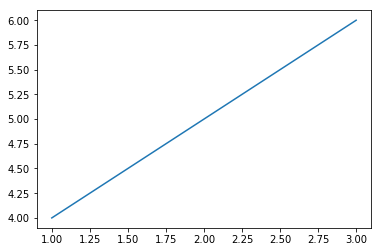

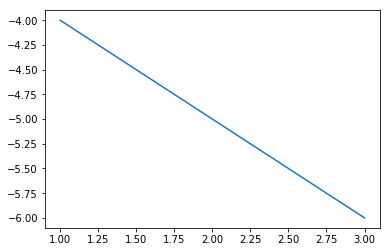

In [5]:
plt.figure() # Explicitly creates a new figure
plt.plot([1,2,3],[4,5,6])
plt.figure() # Explicitly creates a new figure
plt.plot([1,2,3],[-4,-5,-6])
plt.show() # Shows all figures initialized by plt

The <b>current axes</b> and <b>current figure</b> were effectively the same thing in the previous examples. This is not the case when we make subplots:


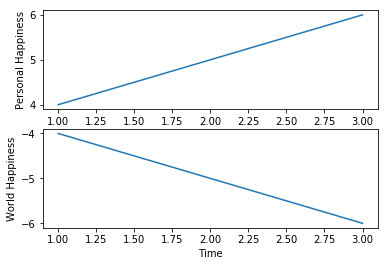

In [6]:
ax1 = plt.subplot(211)
ax1.plot([1,2,3],[4,5,6])
ax1.set_xlabel("Time")
ax1.set_ylabel("Personal Happiness")
ax2 = plt.subplot(212)
ax2.plot([1,2,3],[-4,-5,-6])
ax2.set_xlabel("Time")
ax2.set_ylabel("World Happiness")
plt.show()

The subplot() function specifies `numrows, numcols, plot_number` where `plot_number` ranges from `1` to `numrows*numcols`. When we call the `subplot` function we create `numrows*numcols` subplots inside a single figure. We can address each set of axes individually by assigning them to pointers (e.g., `ax1` and `ax2` in the example). The axes have their own attributes and methods (`ax.plot()` and `ax.set_xlabel()` etc.) that can be used to configure the plot. 

### Basic Plot Types
matplotlib.pyplot comes with many elementary plotting functions for different types of figures. A common subset includes `.plot()`, `.scatter()`, `.bar()`, `.hist()` for lineplots, scatterplots, bar charts, and histograms, respectively. We've already seen `.plot()` but a quick demonstration of the others follows:

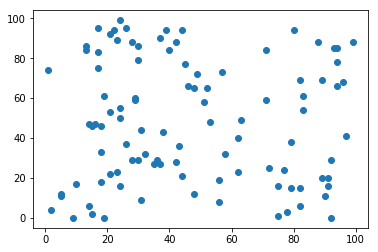

In [7]:
np.random.seed(15422) # for reproducibility
plt.scatter(np.random.randint(0,100,size=100),np.random.randint(0,100,size=100))
plt.show()

In [8]:
plt.bar(["cat_1","cat_2","cat_3"],[4,5,6])
plt.show()

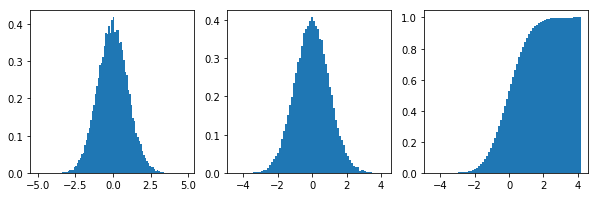

In [9]:
plt.figure(figsize=(10, 3))
np.random.seed(15422) # for reproducibility
data = np.random.normal(size=50000)
ax1 = plt.subplot(131)
n, bins, patches = ax1.hist(data,bins=np.arange(-5,5,0.1),density=1)
ax2 = plt.subplot(132)
n, bins, patches = ax2.hist(data,density=1,bins='rice')
ax3 = plt.subplot(133)
n, bins, patches = ax3.hist(data,density=1,bins='rice',cumulative=True)
plt.show()

The `.hist()` function accepts a specific binning as an explicit list/array, or supports one of many automatic binning strategies (e.g., `rice` used in the middle panel). 

### Plotting Categorical Data
Matplotlib is flexible in plotting catgorical vs numerical data. We can simply supply categorical data along either axis: 

In [10]:
plt.figure(figsize=(10, 3))
ax1 = plt.subplot(131)
ax1.plot(["undergraduate","masters","PhD"],[78.5,81.2,85.4])
ax1.set_ylim(0,100)
ax1.set_ylabel("Average Grade")
ax2 = plt.subplot(132)
ax2.scatter(["undergraduate","masters","PhD"],[78.5,81.2,85.4])
ax2.set_ylabel("Average Grade")
ax2.set_ylim(0,100)
ax3 = plt.subplot(133)
ax3.bar(["undergraduate","masters","PhD"],[78.5,81.2,85.4])
ax3.set_ylabel("Average Grade")
ax3.set_ylim(0,100)
plt.tight_layout()
plt.show()

### Formatting Plots
#### Labels
You can add an x label, y label, and title to your plot with the `plt.xlabel("string")`, `plt.ylabel("string")`, and `plt.title("string")` functions, respectively.

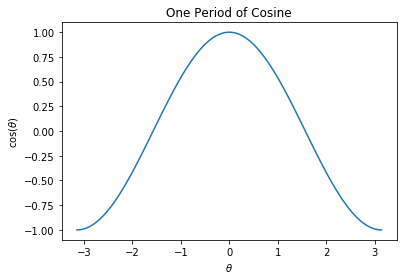

In [11]:
x = np.linspace(-np.pi,np.pi,100)
plt.plot(x,np.cos(x))
plt.xlabel(r"$\theta$")
plt.ylabel(r"cos($\theta$)")
plt.title("One Period of Cosine")
plt.show()

In this example we have used a "raw" string (with prefix `r" "`) to enable latex style specification of special symbols. 

#### Resizing
You can change the dimensions of your figures by using the `plt.figure(figsize=(height,width))` function where `height` and `width` are specified in inches by default. You can call this function before plotting to create a new figure, followed by plotting functions like `plt.plot()` which will be rendered on the figure:

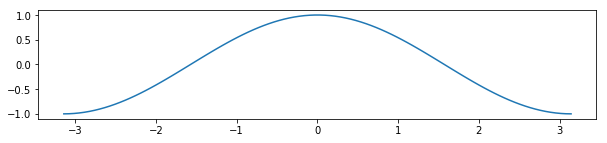

In [12]:
x = np.linspace(-np.pi,np.pi,100)
plt.figure(figsize=(10,2))
plt.plot(x,np.cos(x))
plt.figure(figsize=(10,2))
plt.plot(x,np.sin(x))
plt.show()

#### Colors
All of the built in plotting functions provide ways of modifying the color via the plot function itself. A number of built-in colors are aliased to strings (e.g., "b" means default blue color and "k" means black):

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot with green markers
a = np.random.normal(size=(1000,2))
plt.scatter(a[:,0],a[:,1],c="g")
plt.xlabel("x coord")
plt.ylabel("y coord")
plt.show()

# Lineplot with a black line
x = np.linspace(-np.pi,np.pi,100)
plt.plot(x,np.sin(x),color="k")
plt.xlabel("time")
plt.xlabel("amplitude")
plt.show()

If you want to change the color of certain quantities, it is usually the most straightforward to use separate plotting calls with the corresponding color supplied:

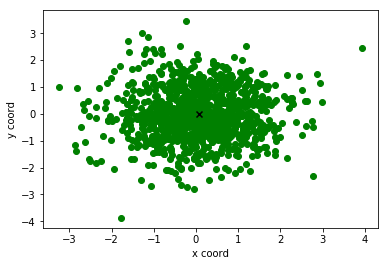

In [14]:
# Scatter plot with green markers and a black x for mean
a = np.random.normal(size=(1000,2))
plt.scatter(a[:,0],a[:,1],c="g") # scatter green
plt.scatter(a[:,0].mean(),a[:,1].mean(),c='k',marker="x")
plt.xlabel("x coord")
plt.ylabel("y coord")
plt.show()

The `alpha` argument can be used to set the transparency of objects (`alpha=1.0` is opaque, default):

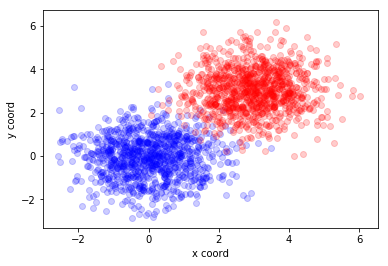

In [15]:
# Scatter plot with transparency
np.random.seed(915432) # for reproducibility
a = np.random.normal(size=(1000,2))
b = np.random.normal(loc=3.0,scale=1.0,size=(1000,2))
plt.scatter(a[:,0],a[:,1],c="b",alpha=0.2) # scatter blue
plt.scatter(b[:,0],b[:,1],c="r",alpha=0.2) # scatter red
plt.xlabel("x coord")
plt.ylabel("y coord")
plt.show()

You can also use specific rgba tuples to set the color and transparency of your choice: 

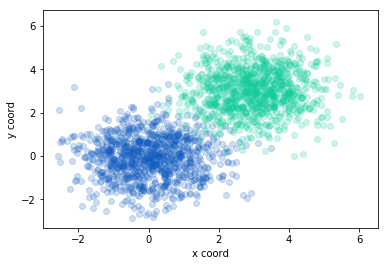

In [16]:
# Scatter plot with transparency
np.random.seed(915432) # for reproducibility
a = np.random.normal(size=(1000,2))
b = np.random.normal(loc=3.0,scale=1.0,size=(1000,2))
plt.scatter(a[:,0],a[:,1],c=np.array([[0.05,0.35,0.75,0.2]])) # scatter blue
plt.scatter(b[:,0],b[:,1],c=np.array([(0.05,0.8,0.6,0.2)])) # scatter green
plt.xlabel("x coord")
plt.ylabel("y coord")
plt.show()

<b>Note:</b> we use a 2D array with a single value to suppress a warning, but just putting a single value will also work.

You can also use built in colormaps to select colors using the `cm` submodule of `matplotlib`. The simplest way to access colors is to use the `cm.colormap_name(value)` method. Here `colormap_name` can be any of the many built-in colormaps (e.g., `viridis`, `plasma` for continuous or `RdBu` for divergent). By default the colormap called in this way is normalized to values between 0 and 1, so you could call it with `cm.viridis(0.5)` and the midpoint color would be returned. `np.linspace(0,1,N)` comes in handy if you know the number of curves (`N`) you want to plot in advance:

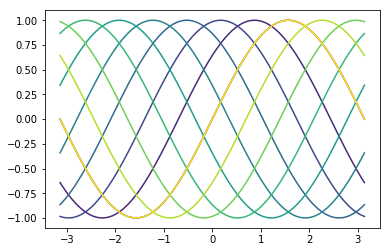

In [17]:
from matplotlib import cm
colors = [ cm.viridis(x) for x in np.linspace(0,1,10) ] # list of colors
x = np.linspace(-np.pi,np.pi,100)
for count_i,i in enumerate(np.linspace(0,2.0*np.pi,10)): # iterate over phase shift
  plt.plot(x,np.sin(x+i),color=colors[count_i]) # plot with current color
plt.show()

#### Axis Scaling
The `plt.xscale()` and `plt.yscale()` functions can be used to change a plot from linear (`linear`, default) scaling to logarithmic (`log`):

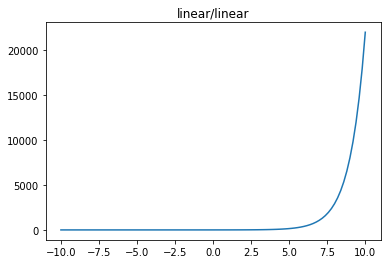

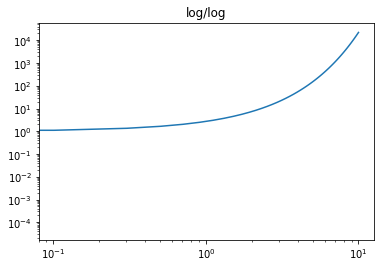

In [21]:
x = np.linspace(-10,10,100)
plt.figure()
plt.plot(x,np.exp(x))
plt.title('linear/linear')
plt.figure()
plt.plot(x,np.exp(x))
plt.yscale('log')
plt.title('linear/log')
plt.figure()
plt.plot(x,np.exp(x))
plt.xscale('log')
plt.yscale('log')
plt.title('log/log')
plt.show()

## Connecting with Numpy
Let's finish the demonstration of matplotlib by working through a short linear regression example using numpy. This will plant the seed for our later lecture on more sophisticated regression while also reinforcing what we recently learned about numpy. 

### Reading in Data
I have supplied some data with this notebook that is in the data.txt file. If you take a look at it (you should make a habit of this), it is just a space delimited file with unlabeled x and y data and a one line header. Let's read it in using the numpy built-in `np.loadtxt` function and visualize what we have:

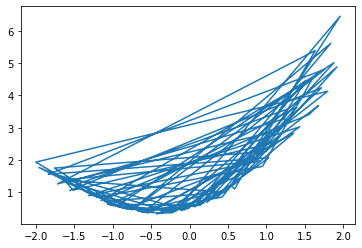

In [24]:
data = np.loadtxt('data.txt',skiprows=1)
plt.figure()
plt.plot(data[:,0],data[:,1])
plt.show()

That doesn't look very informative. That's because the data isn't sorted by x values. A simple solution is just to plot the scatter instead of a line, but let's also use this opportunity to use `np.argsort()`:

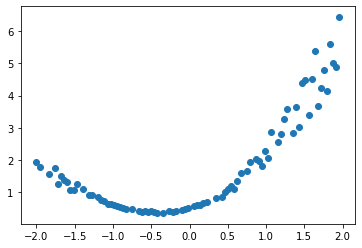

In [23]:
plt.figure()
plt.scatter(data[:,0],data[:,1]) # Easy solution, just use the points, no lines
plt.show()

inds = np.argsort(data[:,0])
plt.plot(data[inds,0],data[inds,1]) # Sort the (x,y) pairs by the x values
plt.show()

After visualization, we can see that the data exhibits a roughly parabolic relatioinship. Let's fit a least-squares model to the data. 

### Linear Regression - Theory
In basic linear regression modeling we attempt to built a model of the form
$$ \mathbf{y} = \mathbf{x}\mathbf{\beta} + \mathbf{\varepsilon} $$
where $\mathbf{y}$ are the values we want to predict, $\mathbf{x}$ are the values of the variables we want to base our predictions on, $\mathbf{\varepsilon}$ are the residuals between the predicted value and the real value, and $\mathbf{\beta}$ is a vector of constants to be determined such that the residuals are minimized. All of these quantities are vectors or matrices. $\mathbf{y}$ is an $N_s$ by $1$ vector, where $N_s$ is the number of samples. $\mathbf{x}$ is an $N_s$ by $N_x + 1$ matrix, where $N_x$ is the number of predictor variables with an extra column of $1$s used to define an optional intercept term. $\mathbf{\beta}$ is an $N_x$ by $1$ vector, and $\mathbf{\varepsilon}$ is an $N_s$ by $1$ vector holding the differences between the predicted values for each sample ($\mathbf{x}_i\cdot\beta$). 

The least squares solution corresponds to selecting $\mathbf{\beta}$ such that the square of the residuals is minimized:

$$\underset{\beta}{\mathrm{arg \, min}}\sum_{i}\left(y_{i} - \mathbf{x}_{i}\mathbf{\beta}\right)^2 $$

This can be solved by taking the derivative and solving for the extremum. Or more concisely:

$$ \mathbf{x}\mathbf{\beta} = \mathbf{y} $$
$$  \mathbf{\beta} = \left(\mathbf{x}^\mathrm{T}\mathbf{x}\right)^{-1}\mathbf{x}^\mathbf{T}\mathbf{y} $$

Where the second line follows by multiplying each side by $\mathbf{x}^\mathrm{T}$ then taking the inverse. This deals with rank deficiency for tall matrices (i.e., when there are more samples than variables and the system of equations is inconsistent).

<b>Note: the above description also generalizes to $\mathbf{y}$ containing multiple variables, but the $\mathbf{\beta}$ and $\mathbf{y}$ matrices would change shape.</b>   

### Linear Regression - Application
Returning to our example, we have data that looks approximately parabolic so let's try fitting a cubic polynomial to the data:

$$ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 $$

The data we have just has one independent variable (x) and our model has four parameters ($\beta_{0-3}$). Adapting this to the situation in the previous section, the first step is to form our $\mathbf{x}$ matrix given our model. The answer is to form the matrix:

$$ \mathbf{x} = \begin{bmatrix}
 1 & x_0 & x_{0}^{2} & x_{0}^3 \\
 1 & x_1 & x_{1}^{2} & x_{1}^3 \\
 \vdots & \vdots & \vdots & \vdots \\
 1 & x_N & x_{N}^{2} & x_{N}^3 
 \end{bmatrix} $$

If you have trouble remembering what your $\mathbf{x}$ matrix should be, maybe you can remember that we want $\mathbf{x\beta}=\mathbf{y}$ to reproduce our set of equations for the problem. For our $\mathbf{x}$ and $\beta$, $\mathbf{x\beta}=\mathbf{y}$ would yield:

$$ \begin{array} {c}
\beta_0 + \beta_1 x_0 + \beta_2 x_{0}^2 + \beta_3 x_{0}^3 = y_0 \\
\beta_0 + \beta_1 x_1 + \beta_2 x_{1}^2 + \beta_3 x_{1}^3 = y_1 \\
\vdots \\
\beta_0 + \beta_1 x_N + \beta_2 x_{N}^2 + \beta_3 x_{N}^3 = y_N \\
\end{array} $$

where we want to find the $\beta_{0-3}$ that minimizes the squared errors with respect to the right hand side of the equations. So we have our specific $\mathbf{x}$ for this problem. Continuing to adapt the results from the previous section, we have two results:

$$ \mathbf{x}^\mathrm{T}\mathbf{x}\mathbf{\beta} = \mathbf{x}^\mathrm{T}\mathbf{y} $$
$$  \mathbf{\beta} = \left(\mathbf{x}^\mathrm{T}\mathbf{x}\right)^{-1}\mathbf{x}^\mathbf{T}\mathbf{y} $$

The first result just comes from multiplying our system of equations by $\mathbf{x}^\mathrm{T}$, and the second just comes from applying the inverse to both sides. If you have trouble remembering this, remember that we have more equations (N) than we have variables (4), so we can't usually solve $\mathbf{x\beta}=\mathbf{y}$ directly (the inverse of $\mathbf{x}$ doesn't exist), unless a bunch of the rows are essentially redundant. After multiplying both sides by $\mathbf{x}^\mathrm{T}$ we are only left with four equations and four unknowns (check the dimensions of the matrix multiplication). It turns out that this system of four equations solves the least-squares regression problem. 

We can solve the problem using either of the previous two equations. The first can be solved using gaussian elimination and backsubtitution. The second involves calculating the inverse and is generally much more expensive. Let's solve the problem both ways using numpy's built in `np.lstsq()` and `np.linalg.inv()` functions, respectively, and prove that they are equivalent. 

In [21]:
# Make our X matrix
X = np.ones([len(data),4])
X[:,1] = data[:,0]
X[:,2] = data[:,0]**(2.0)
X[:,3] = data[:,0]**(3.0)

# Calculate our parameters using the lstsq() function
beta_1 = np.linalg.lstsq(X.T.dot(X),X.T.dot(data[:,1]))[0] # Check docs to see all of the returns from lstsq
print("parameters for method 1: {}".format(beta_1))

# Calculate our parameters using the inverse
beta_2 = np.dot(np.dot(np.linalg.inv(X.T.dot(X)),X.T),data[:,1])
print("parameters for method 2: {}".format(beta_2))

# Make y predictions for our two models
x_grid = np.linspace(min(data[:,0]),max(data[:,0]),100) # just generating some x values that span the range of the supplied data.
y_1 = beta_1[0] + beta_1[1]*x_grid + beta_1[2]*x_grid**(2.0) + beta_1[3]*x_grid**(3.0)
y_2 = beta_2[0] + beta_2[1]*x_grid + beta_2[2]*x_grid**(2.0) + beta_2[3]*x_grid**(3.0)

# Plot our predictions against the data
plt.figure(figsize=(5,5))
plt.scatter(data[:,0],data[:,1],marker='o',label="data")
plt.plot(x_grid,y_1,label="lstsq()")
plt.plot(x_grid,y_1,label="inv()")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

parameters for method 1: [0.54831474 0.78128642 0.84947248 0.04891569]
parameters for method 2: [0.54831474 0.78128642 0.84947248 0.04891569]


/Users/brettsavoie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


As promised, the two methods yielded the same model. We also used our new matplotlib skills to plots the models against the training data, which further comfirms the equivalence of the two expressions and shows pretty good agreement with our data.